In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
#import campnew data as dataframe
campnew=pd.read_csv('..\clean_data\campnew.csv')

In [4]:
campnew.columns

Index(['Unnamed: 0', 'date', 'business_vertical_x', 'country_x', 'region',
       'city_code', 'strategy_id', 'channel_name_x', 'goal_type',
       'total_spend_cpm', 'impressions', 'clicks', 'conversions',
       'business_vertical_y', 'channel_name_y', 'country_y'],
      dtype='object')

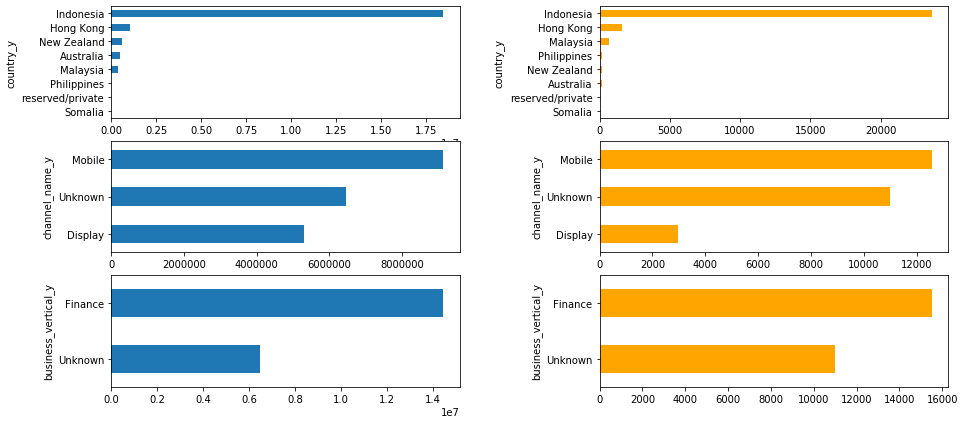

In [98]:
#generate total impressions, total clicks by country, channel_name, and business_vertical separately
fig = plt.figure()
plt.subplots_adjust(wspace=0.4)

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(323)
ax3 = fig.add_subplot(325)

campnew.groupby('country_y')['impressions'].sum().sort_values().plot(kind='barh', ax=ax1, figsize=(15,14))
campnew.groupby('channel_name_y')['impressions'].sum().sort_values().plot(kind='barh', ax=ax2, figsize=(15,7))
campnew.groupby('business_vertical_y')['impressions'].sum().sort_values().plot(kind='barh',ax=ax3, figsize=(15,7))
#ax1.grid(True)

ax4 = fig.add_subplot(322)
ax5 = fig.add_subplot(324)
ax6 = fig.add_subplot(326)

campnew.groupby('country_y')['clicks'].sum().sort_values().plot(kind='barh', ax=ax4, figsize=(15,14), color=['orange'])
campnew.groupby('channel_name_y')['clicks'].sum().sort_values().plot(kind='barh', ax=ax5, figsize=(15,7), color=['orange'])
campnew.groupby('business_vertical_y')['clicks'].sum().sort_values().plot(kind='barh',ax=ax6, figsize=(15,7), color=['orange'])

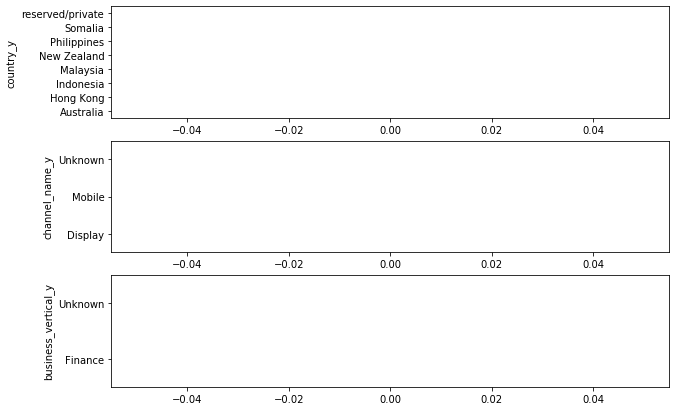

In [35]:
#generate total conversions by country, channel_name, and business_vertical separately
fig = plt.figure()

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

campnew.groupby('country_y')['conversions'].sum().sort_values().plot(kind='barh', ax=ax1, figsize=(10,14))
campnew.groupby('channel_name_y')['conversions'].sum().sort_values().plot(kind='barh', ax=ax2, figsize=(10,7))
campnew.groupby('business_vertical_y')['conversions'].sum().sort_values().plot(kind='barh',ax=ax3, figsize=(10,7))
#ax1.grid(True)

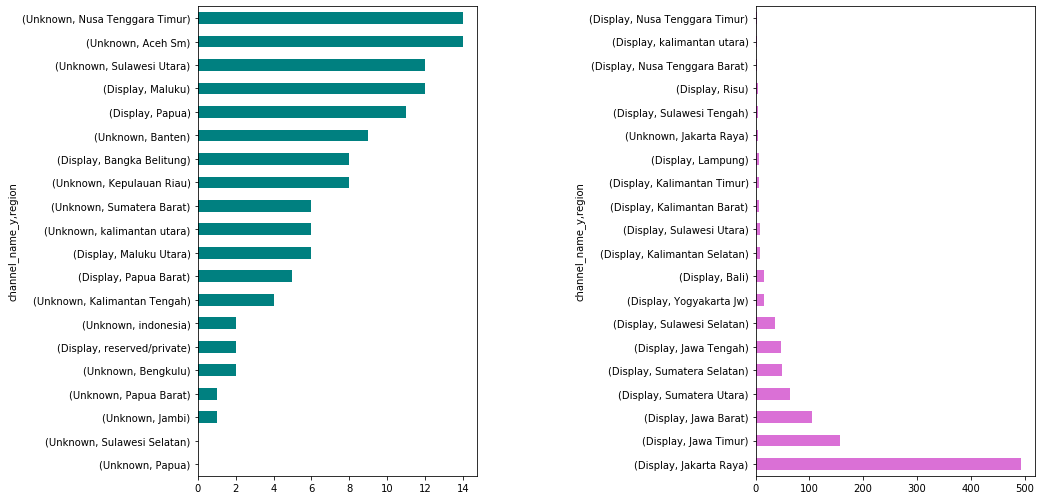

In [104]:
#select strategy_id =3718750. Show top 20 sum of impressions and clicks partitioned by channel_name and region
fig = plt.figure()
plt.subplots_adjust(wspace=1)

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

campnew.loc[campnew['strategy_id']==3718750].groupby(['channel_name_y','region'])['impressions'].sum().sort_values().head(20).plot(kind='barh', ax=ax1, figsize=(15,19), color=['teal'])
campnew.loc[campnew['strategy_id']==3718750].groupby(['channel_name_y','region'])['clicks'].sum().sort_values(ascending=False).head(20).plot(kind='barh', ax=ax2, figsize=(15,19), color=['orchid'])

In [10]:
#convert column 'date' to datetime
campnew['date']=pd.to_datetime(campnew['date'], format='%d/%m/%Y')

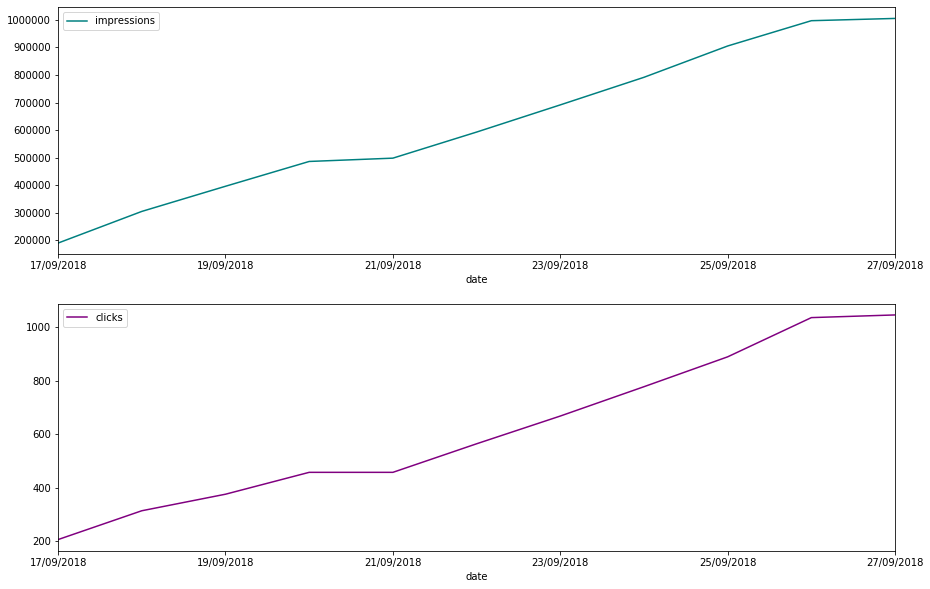

In [56]:
#select strategy_id =3718750. Show the cumulative sum of impressions and clicks over date in ascending order
fig = plt.figure()
plt.subplots_adjust(wspace=1)

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

campnew.loc[campnew['strategy_id']==3718750].groupby(campnew['date'].dt.strftime('%d/%m/%Y'))['impressions'].sum().cumsum().plot(kind='line', ax=ax1, legend=True, figsize=(15,10), color=['teal'])
campnew.loc[campnew['strategy_id']==3718750].groupby(campnew['date'].dt.strftime('%d/%m/%Y'))['clicks'].sum().cumsum().plot(kind='line', ax=ax2, legend=True, figsize=(15,10), color=['purple'])

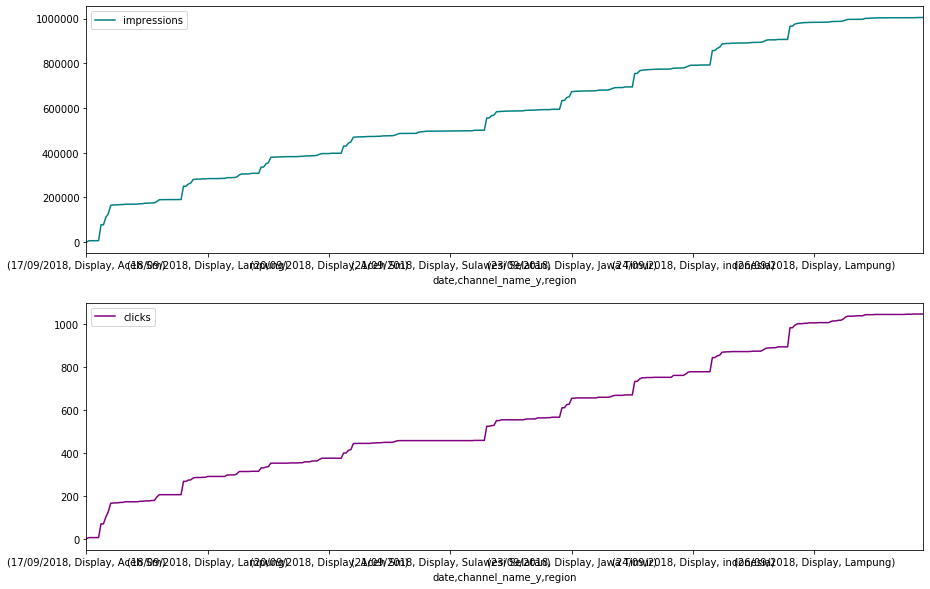

In [54]:
#select strategy_id =3718750. Show the cumulative sum of impressions and clicks by channel_name and region over date in ascending order
fig = plt.figure()
plt.subplots_adjust(wspace=1)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
    
campnew.loc[campnew['strategy_id']==3718750].groupby([campnew['date'].dt.strftime('%d/%m/%Y'),'channel_name_y','region'])['impressions'].sum().cumsum().plot(kind='line', ax=ax1, legend=True, figsize=(15,10), color=['teal'])
campnew.loc[campnew['strategy_id']==3718750].groupby([campnew['date'].dt.strftime('%d/%m/%Y'),'channel_name_y','region'])['clicks'].sum().cumsum().plot(kind='line', ax=ax2, legend=True, figsize=(15,10), color=['purple'])

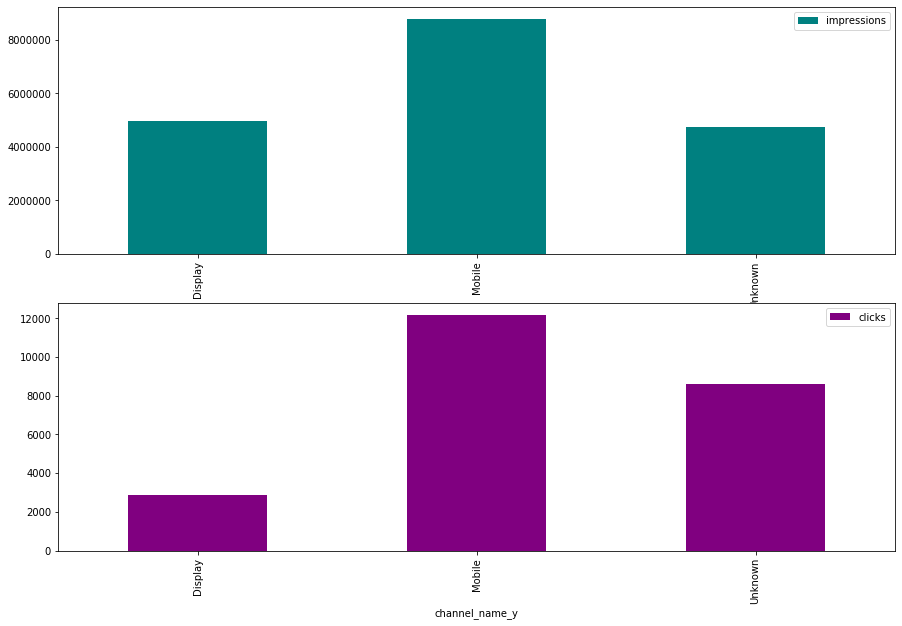

In [61]:
#from previous results, we can know that Indonesia has the highest impressions and clicks. Show the sum of impressions and clicks by channel name
fig = plt.figure()
plt.subplots_adjust(wspace=1)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
    
campnew.loc[campnew['country_y']=='Indonesia'].groupby(['channel_name_y'])['impressions'].sum().plot(kind='bar', ax=ax1, legend=True, figsize=(15,10), color=['teal'])
campnew.loc[campnew['country_y']=='Indonesia'].groupby(['channel_name_y'])['clicks'].sum().plot(kind='bar', ax=ax2, legend=True, figsize=(15,10), color=['purple'])

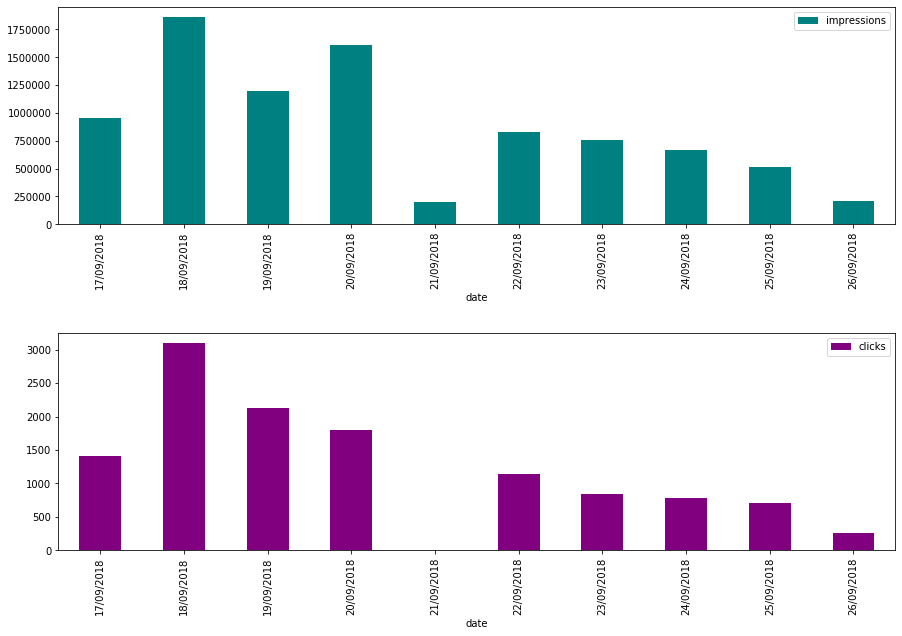

In [68]:
#from previous result, we can know that mobile is the top main channel for impressions and clicks for Indonesia market. Show the trend of impressions and clicks of mobile channel for Indonesia
#result shows that on day 18/09/2018, the impressions and clicks are most popular in Indonesia market. Maybe bcz of new campgain or new feature on application, which is not sure as we don't have the related information
fig = plt.figure()
plt.subplots_adjust(hspace=0.5)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
    
campnew.loc[(campnew['country_y']=='Indonesia') & (campnew['channel_name_y']=='Mobile')].groupby(campnew['date'].dt.strftime('%d/%m/%Y'))['impressions'].sum().plot(kind='bar', ax=ax1, legend=True, figsize=(15,10), color=['teal'])
campnew.loc[(campnew['country_y']=='Indonesia') & (campnew['channel_name_y']=='Mobile')].groupby(campnew['date'].dt.strftime('%d/%m/%Y'))['clicks'].sum().plot(kind='bar', ax=ax2, legend=True, figsize=(15,10), color=['purple'])